In [1]:
%matplotlib notebook

In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from functools import reduce
import matplotlib.cm as cm, matplotlib.font_manager as fm
from shapely.geometry import Polygon
from geopy.distance import great_circle
from geopandas import GeoDataFrame

In [3]:
treepoints=GeoDataFrame.from_file('C:/ShapeFiles/Trees_SD/Trees_SD.shp')


In [4]:
census=GeoDataFrame.from_file('C:/ShapeFiles/CENSUS_BLOCKS_2010/CENSUS_BLOCKS_2010.shp')

<IPython.core.display.Javascript object>


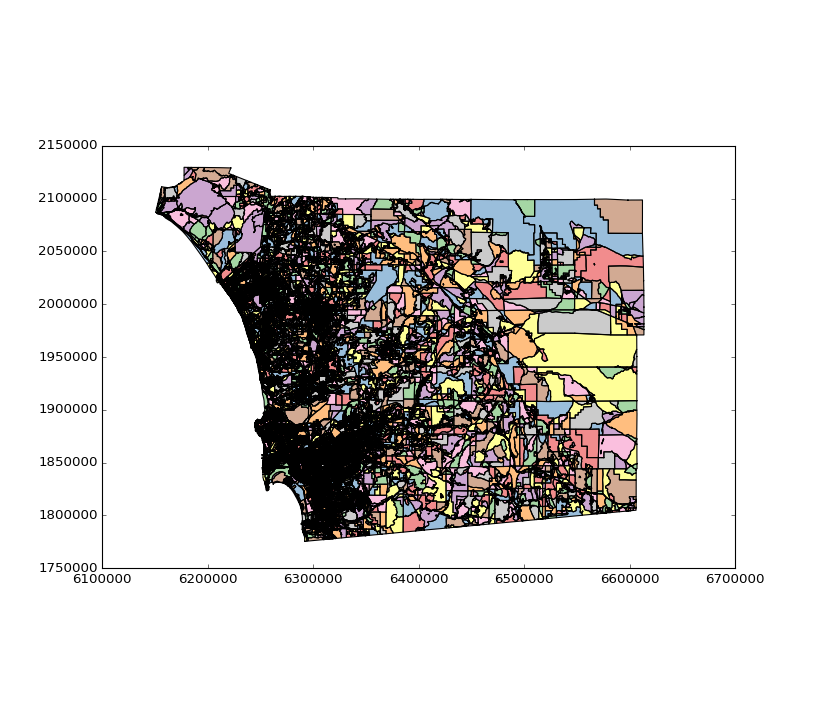

In [20]:
#census.geometry.plot()

<IPython.core.display.Javascript object>


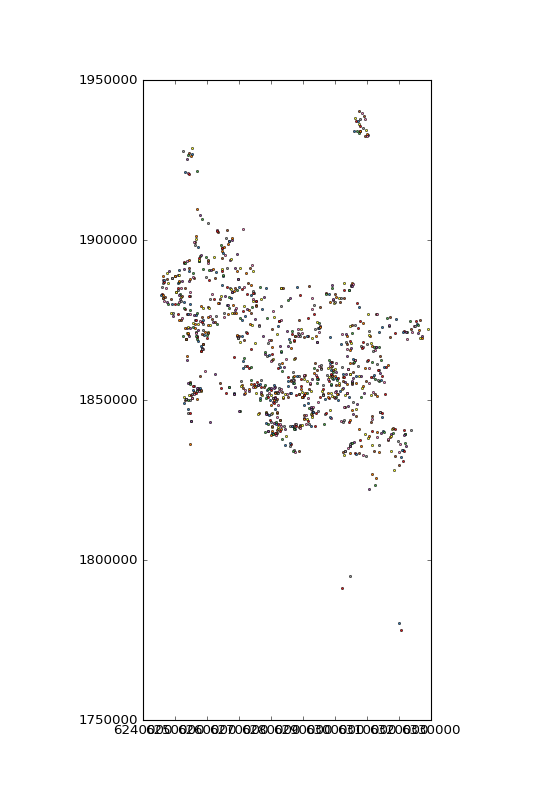

In [5]:

treepoints.geometry[0:1000].plot(figsize=(7,10))


In [6]:
SRANums=GeoDataFrame.from_file('C:/ShapeFiles/SRA/SRA2010tiger.shp')

<IPython.core.display.Javascript object>


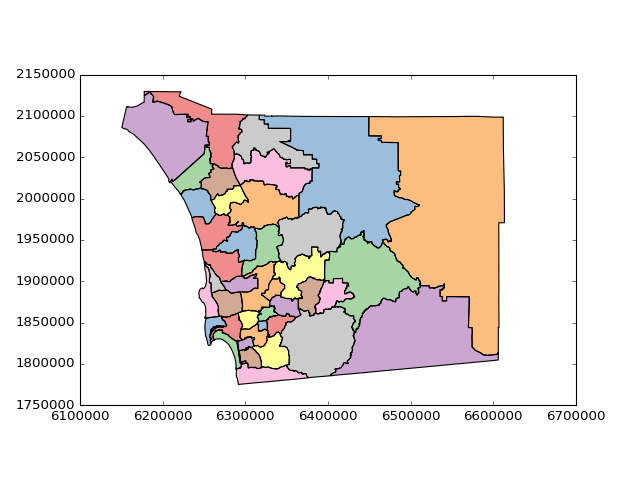

In [7]:
SRANums.geometry.plot()

In [8]:
SRANums.head()

,NAME,SRA,geometry
0,CENTRAL SAN DIEGO,1,"POLYGON ((6291831.391448048 1858989.066273435,..."
1,PENINSULA,2,"POLYGON ((6271747.439371936 1857616.573003404,..."
2,CORONADO,3,"POLYGON ((6268054.352894944 1841291.321949599,..."
3,NATIONAL CITY,4,"POLYGON ((6306396.165897838 1832843.705761828,..."
4,SOUTHEASTERN SAN DIEGO,5,"POLYGON ((6314723.469153286 1847708.326854354,..."


In [9]:
SRAList=SRANums.geometry.as_matrix()
intersections=[ reduce(lambda x,y:x+y.intersects(poly),treepoints.geometry.as_matrix(), 0) for poly in SRAList]

In [37]:
SRArea=np.array([item.area for item in SRAList])
TreesPerArea=intersections/SRArea

In [38]:
SRANums['TreesPerArea']=TreesPerArea

<IPython.core.display.Javascript object>


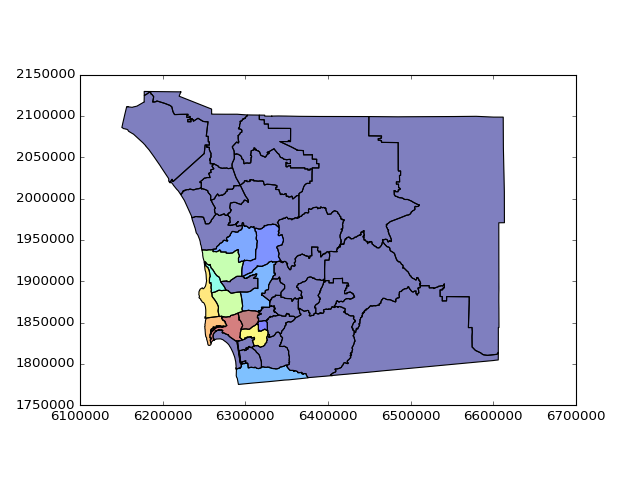

In [39]:
SRANums.plot(column='TreesPerArea')